<a href="https://colab.research.google.com/github/pedrovsglima/python-neural-networks/blob/main/freecodecamp/module4_tensorflow_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q scikit-learn

In [2]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


### dataset

In [4]:
# mnist dataset
# 60,000 images for training and 10,000 images for validation/testing

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_images.shape
# 28 x 28 pixels

(60000, 28, 28)

In [8]:
train_images[0, 23, 23]

194

In [9]:
class_names = ["T-shiirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

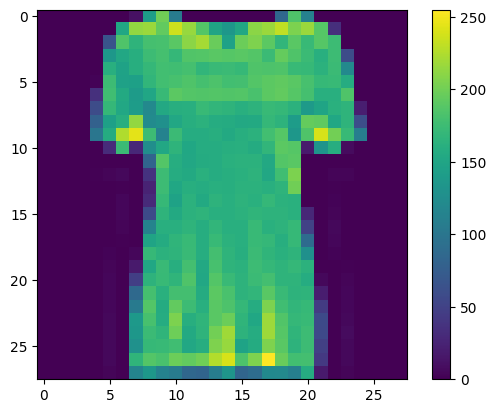

In [12]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

### data preprocessing

In [14]:
# scale all of our greyscale pixel values (0-255) to be between 0 and 1

train_images = train_images / 255.0
test_images = test_images / 255.0

### building model

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),    # input layer
    keras.layers.Dense(128, activation="relu"),   # hidden layer
    keras.layers.Dense(10, activation="softmax"), # output layer
])

In [16]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### training

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4961 - accuracy: 0.8254
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3773 - accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3390 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3147 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2944 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2808 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2679 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2567 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2478 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.238

### test

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.3391 - accuracy: 0.8762


0.8762000203132629

### making predictions

In [21]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [23]:
predictions[0] # probability distribution

array([1.7727508e-07, 1.1958332e-11, 2.7378115e-11, 3.2890756e-13,
       5.4551887e-09, 4.7730398e-04, 2.6499908e-08, 1.8729232e-03,
       2.6344373e-09, 9.9764955e-01], dtype=float32)

In [27]:
idx = np.argmax(predictions[0])
class_names[idx]

'Ankle boot'

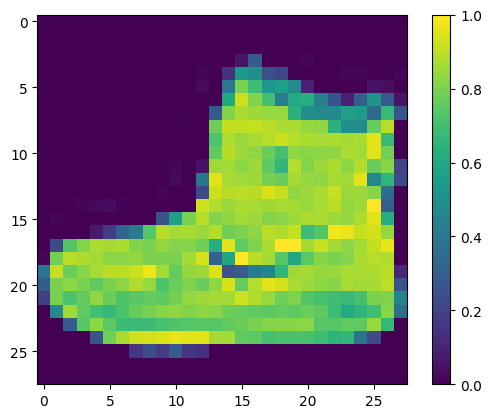

In [26]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()